In [16]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import sympy as sp

# Lab 03: Errores y estabilidad

---
### Profesor: Juan Marcos Marín
### Nombre: Soleil Dayana Niño Murcia
*Métodos computacionales 2024-II*

---

#1. Serie Seno
Considere la serie de Taylor para el seno

$$\sin(x) = \sum^{\infty}_{n=1} (-1)^{n}\frac{x^{2n-1}}{(2n-1)!} $$

a. Defina una función que a partir de la *serie de Taylor* y un valor de $x$ en radianes encuentre el valor de $\sin(x)$.

In [ ]:
# Calcula el valor de seno a partir de la serie de Taylor (a : angulo en radianes, n : número de iteraciones)
def seno_taylor(a, n):
  seno = 0
  for i in range (n):
    seno += ((-1)**i)*(a**(2*i+1))/math.factorial(2*i+1)
  return seno

In [ ]:
x = math.radians(30)
iter = 10
seno = seno_taylor(x, iter)
seno_real = math.sin(x)
print('Seno por serie de Taylor:', seno, 'vs. Seno real:', seno_real)
print('Are these values equal?:',seno == seno_real)

Seno por serie de Taylor: 0.49999999999999994 vs. Seno real: 0.49999999999999994
Are these values equal?: True


b. Usando $x$ como `float32` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.



In [ ]:
def taylor_sin_with_tolerance(a, tolerance):
  sin = 0
  real = math.sin
  i = 0
  while abs(real(a)-sin) > tolerance:
    sin += ((-1)**i)*(a**(2*i+1))/math.factorial(2*i+1)
    i += 1
  return sin, i

In [ ]:
x = math.radians(80)
tolerance = np.finfo(np.float32).eps # Definido para Epsilon de la máquina
seno, N = taylor_sin_with_tolerance(x, tolerance)
seno_real = math.sin(x)
print('Seno por serie de Taylor empleando un límite para cumplir la  tolerancia de', N, 'iteraciones:', seno, 'vs. Seno real:', seno_real)

Seno por serie de Taylor empleando un límite de tolerancia de 6 iteraciones: 0.9848077408146284 vs. Seno real: 0.984807753012208


6 iteraciones


c. Ahora, usando $x$ como `float64` encuentre cuántos términos de la serie son necesarios para obtener una convergencia con un error absoluto menor al $ϵ$ de la máquina para dicho tipo de variable. Para el valor exacto use `math.sin()`.



In [ ]:
x = math.radians(80)
tolerance = np.finfo(np.float64).eps # Definido para Epsilon de la máquina
seno, N = taylor_sin_with_tolerance(x, tolerance)
seno_real = math.sin(x)
print('Seno por serie de Taylor en', N, 'términos.', seno, 'vs. Seno real:', seno_real)

Seno por serie de Taylor en 10 términos. 0.9848077530122078 vs. Seno real: 0.984807753012208


10 iteraciones


d. Describa los errores porcentuales para cada cálculo y por qué pueden existir diferencias.

In [17]:
def taylor_errors(a,tolerance):
  max_iter, sin, real_sin, i = 100, 0, math.sin(a), 0
  errors, iteraciones = np.zeros(max_iter), np.arange(max_iter)
  while abs(real_sin - sin) > tolerance:
    sin += ((-1)**i)*(a**(2*i+1))/math.factorial(2*i+1)
    error = abs(real_sin - sin)
    errors[i] = error
    i += 1
    if i > max_iter:
      break
  return errors[:i], iteraciones[:i], sin

In [18]:
x = math.radians(60)
tol64 = np.finfo(np.float64).eps
tol32 = np.finfo(np.float32).eps
error64, n64, sin64 = taylor_errors(x, tol64)
error32, n32, sin32 = taylor_errors(x, tol32)

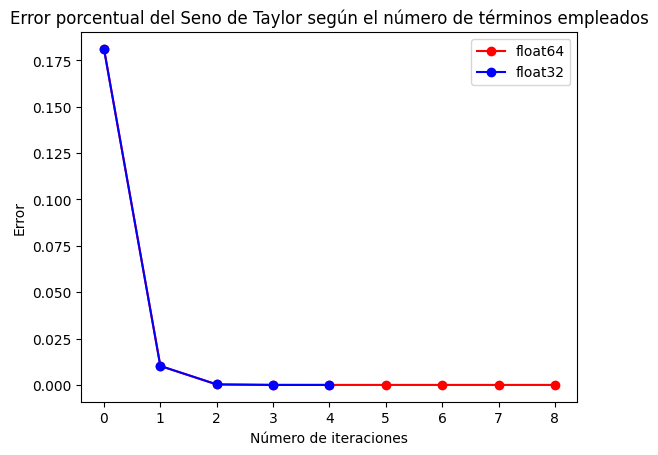

In [19]:
plt.plot(n64, error64, 'ro-', label = 'float64')
plt.plot(n32, error32, 'bo-', label = 'float32')
#plt.yscale('log')
#plt.xscale('log')
plt.title('Error porcentual del Seno de Taylor según el número de términos empleados')
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()

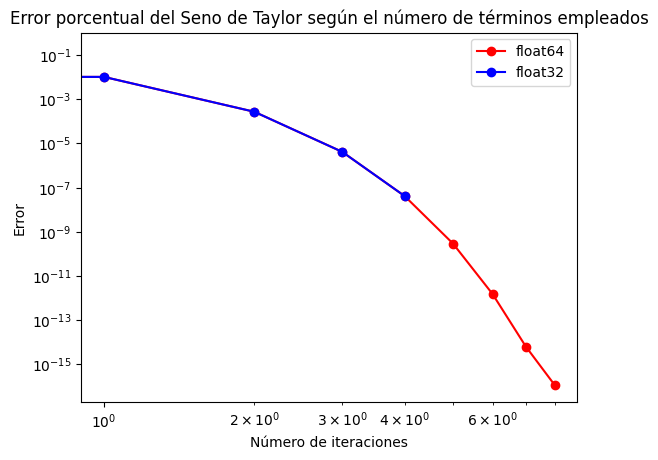

In [20]:
plt.plot(n64, error64, 'ro-', label = 'float64') # Log
plt.plot(n32, error32, 'bo-', label = 'float32')
plt.yscale('log')
plt.xscale('log')
plt.title('Error porcentual del Seno de Taylor según el número de términos empleados')
plt.xlabel('Número de iteraciones')
plt.ylabel('Error')
plt.legend()

La diferencia entre los errores porcentuales del método con 32 bits y 64 bits no reporta diferencias considerables comparando con el mismo número de iteraciones en ambos casos;  sin embargo, el método con 64 bits permite más iteraciones y por tanto se va disminuyendo de forma importante el error porcentual conforme se emplean más iteraciones.

#2. Serie Exponencial
Considere la serie para $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

a. Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}




In [25]:
def exponencial_taylor(x, n): # Define la función exponencial
  if x > 1:
    print('El valor de x debe ser menor o igual a 1')
  else:
    exponencial = 0
    for i in range (n+1):
      exponencial += ((-1)**i)*(x**i)/math.factorial(i)
    return exponencial, i

In [26]:
x, n = -3, 1000
x_byfunction, iter = exponencial_taylor(x,n)
x_real = np.exp(-x)
print('Exponencial para x = -3 por serie de Taylor en', iter, 'iteraciones:', x_byfunction, 'vs. Exponencial real:', x_real)

Exponencial para x = -3 por serie de Taylor en 1000 iteraciones: 20.08553692318766 vs. Exponencial real: 20.085536923187668


In [27]:
x, N = 1, 0
while True:
  N += 1
  suma, n = exponencial_taylor(x, N)
  next = (-1)*(N + 1) * (x*(N + 1)) / math.factorial(N + 1)
  if abs(next) <= abs(10**-7 * suma):
    break

# Calcular la serie y comparar con np.exp(-x)
serie_final_value, n = exponencial_taylor(x, N)
real = np.exp(-x)

print(f"Valor por serie para x = {x} empleando {n} términos: {serie_final_value}")
print(f"Valor por exponencial (-x) de numpy para (x = {x}): {real}")

Valor por serie para x = 1 empleando 12 términos: 0.3678794413212817
Valor por exponencial (-x) de numpy para (x = 1): 0.36787944117144233


Em caso de tomar x = 1, N debe ser menor a 11 para que se cumpla el enunciado.

b. Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.


In [43]:
def exp_terms(x, N):
    terms = []
    for i in range(N + 1):
        termino = (-1)**i * (x**i) / math.factorial(i)
        terms.append(termino)

    for i, termino in enumerate(terms):
        print(f"Iter {i}: {termino}")

    near = int(round(x - 1))  # Imprime los términos alrededor de n ≈ x - 1
    print(f"\nAlrededor de n ≈ x - 1 en {near} iteraciones:")
    for i in range(max(0, near - 2), min(N + 1, near + 3)):
        print(f"Iteración {i}: {terms[i]}")

In [45]:
x, N = 10, 15
exp_terms(x, N)

Iter 0: 1.0
Iter 1: -10.0
Iter 2: 50.0
Iter 3: -166.66666666666666
Iter 4: 416.6666666666667
Iter 5: -833.3333333333334
Iter 6: 1388.888888888889
Iter 7: -1984.126984126984
Iter 8: 2480.15873015873
Iter 9: -2755.731922398589
Iter 10: 2755.731922398589
Iter 11: -2505.210838544172
Iter 12: 2087.67569878681
Iter 13: -1605.9043836821616
Iter 14: 1147.0745597729724
Iter 15: -764.7163731819817

Alrededor de n ≈ x - 1 en 9 iteraciones:
Iteración 7: -1984.126984126984
Iteración 8: 2480.15873015873
Iteración 9: -2755.731922398589
Iteración 10: 2755.731922398589
Iteración 11: -2505.210838544172


c. Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.

In [62]:
def inverse_method(x, N):
    """Calcula 1/e^x usando la serie de Taylor para e^x."""
    result = 0.0
    for n in range(N + 1):
        term = (x**n) / math.factorial(n)
        result += term
    return 1 / result  # Invertir el resultado para obtener e^-x

x, tol, N = 10.0,  1e-7, 0
approx_exp = 0
while True:
    N += 1
    approx_exp = inverse_method(x, N)
    error = abs(approx_exp - np.exp(-x))
    if error < tol:
        break

print(f"Número de términos para la convergencia (x ≈ 10): {N}")
print(f"Valor obtenido: {approx_exp}")
print(f"Valor esperado (np.exp(-x)): {np.exp(-x)}")

Número de términos para la convergencia (x ≈ 10): 20
Valor obtenido: 4.547215139175042e-05
Valor esperado (np.exp(-x)): 4.5399929762484854e-05


d. Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, usa el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


In [55]:
def serie_exp(x, N):
    sum = 0
    for n in range(N + 1):
        termino = (-1)**n * (x**n) / math.factorial(n)
        sum += termino
    return sum
N = 20
tolerancia = 1e-7
valores_x = list(range(1, 11)) + list(range(10, 101, 10))

print(f"{'x':<10} {'Aproximación':<20} {'np.exp(-x)':<20} {'Error':<20} {'Convergencia':<10}")
print("_" * 90)

for x in valores_x:
    aproximacion = serie_exp(x, N)
    real = np.exp(-x)
    error = abs(aproximacion - real)

    # Determinar si cumple la tolerancia
    convergencia = "Sí" if error < tolerancia else "No"

    # Imprimir resultados
    print(f"{x:<10} {aproximacion:<20} {real:<20} {error:<20} {convergencia:<10}")

x          Aproximación         np.exp(-x)           Error                Convergencia
__________________________________________________________________________________________
1          0.36787944117144245  0.36787944117144233  1.1102230246251565e-16 Sí        
2          0.1353352832366504   0.1353352832366127   3.7692071686024065e-14 Sí        
3          0.04978706854792016  0.049787068367863944 1.8005621299499452e-10 Sí        
4          0.018315711651223532 0.01831563888873418  7.276248935317309e-08 Sí        
5          0.006745540097711817 0.006737946999085467 7.593098626350325e-06 No        
6          0.0028154200509777406 0.0024787521766663585 0.0003366678743113821 No        
7          0.009183673977218289 0.0009118819655545162 0.008271792011663772 No        
8          0.13229825662634914  0.00033546262790251185 0.13196279399844663  No        
9          1.5142101415414988   0.00012340980408667956 1.514086731737412    No        
10         13.396865995695713   4.5399929

La serie ya no converge a partir de la quinta iteración. Pierde pre

e. Realiza una serie de gráficos del error versus $N$ para diferentes valores de $x$.

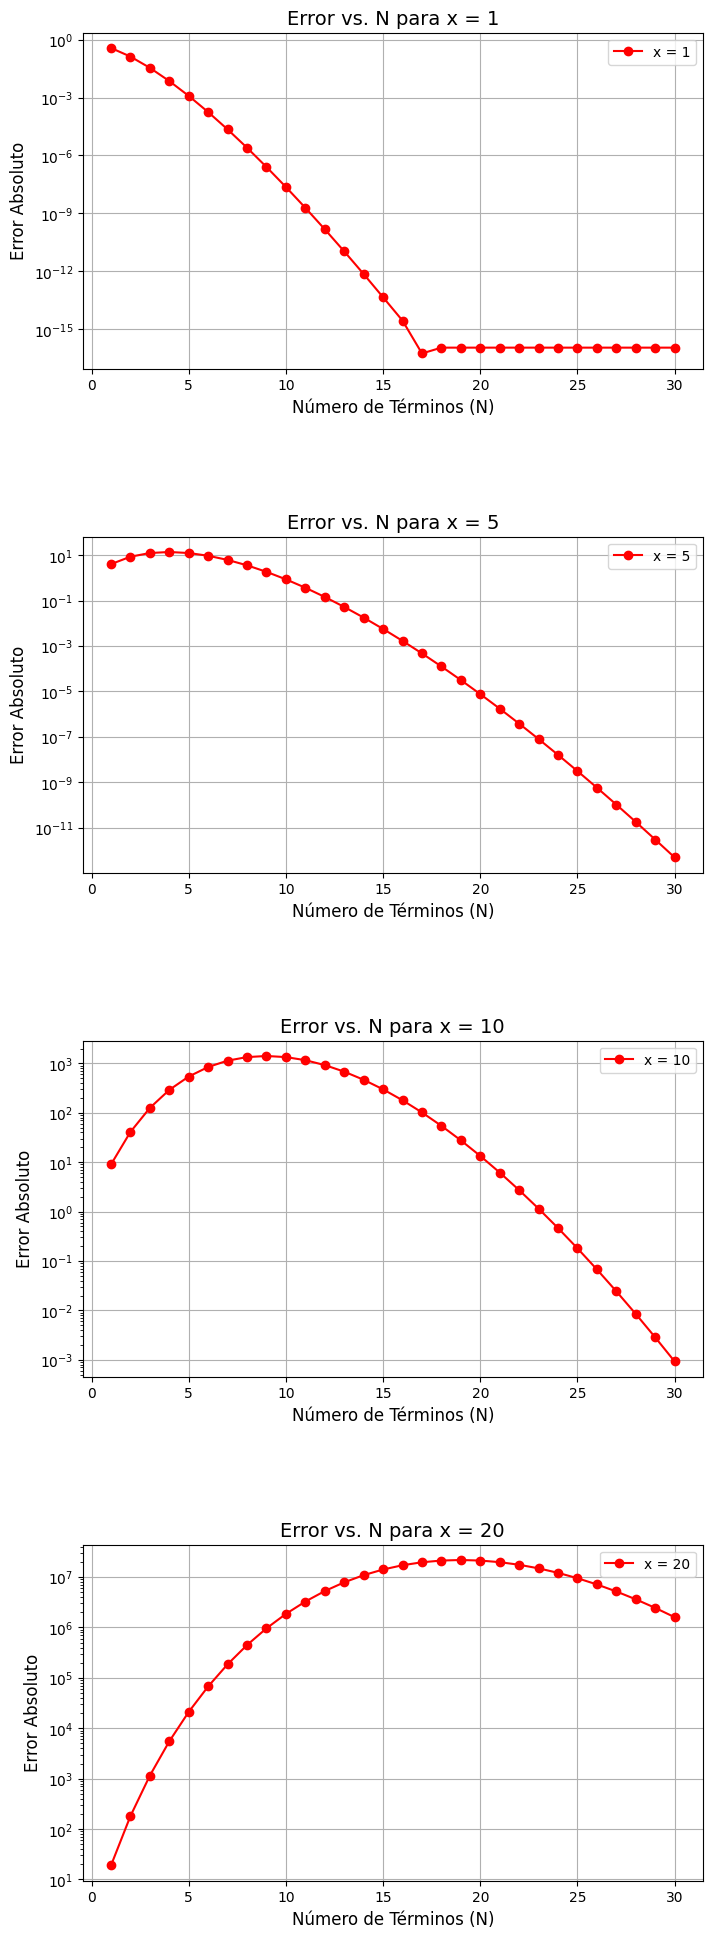

In [59]:
valores_x, valores_N = [1, 5, 10, 20], range(1, 31)

fig, ejes = plt.subplots(len(valores_x), 1, figsize=(8, 6 * len(valores_x)))
fig.subplots_adjust(hspace=0.5)

for i, x in enumerate(valores_x):
    errores = []
    for N in valores_N:
        resultado_serie = serie_exp(x, N)
        resultado_numpy = np.exp(-x)
        error = abs(resultado_serie - resultado_numpy)
        errores.append(error)

    eje = ejes[i]
    eje.plot(valores_N, errores, label=f"x = {x}", marker="o", color = 'red')
    eje.set_title(f"Error vs. N para x = {x}", fontsize=14)
    eje.set_xlabel("Número de Términos (N)", fontsize=12)
    eje.set_ylabel("Error Absoluto", fontsize=12)
    eje.set_yscale("log")  # Escala log
    eje.legend()
    eje.grid(True)

plt.show()

# 3. Serie $S_N$

Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados númericos  pueden tener diferencias.


a.  Escribir tres funciones para que realicen el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$

In [71]:
def S1(N):
  sum = 0
  for n in range(2*N):
    a = (-1)**n
    b = n/( n+1)
    sum += a*b
  return sum, n

def S2(N):
  sum1, sum2 = 0, 0
  total = 0
  for n in range(N):
    if n == 0:
      none = 0
    else:
      sum1 += 2*n/(2*n + 1)
      sum2 += (2*n -1)/(2*n)
      total += sum1 - sum2
  return total, n

def S3(N):
  sum = 0
  for n in range(N):
    if n == 0:
      none = 0
    else:
      sum += 1/(2*n*(2*n + 1))
  return sum, n

b. Estudiar la convergencia de la serie para los tres casos.

In [93]:
def S1_N(N):
    suma = 0
    for n in range(1, 2 * N + 1):
        suma += (-1)**(n-1) * n / (n + 1)
    return suma

def S2_N(N):
    suma_impares = 0
    for n in range(1, N + 1):
        suma_impares += -(2 * n - 1) / (2 * n)

    suma_pares = 0
    for n in range(1, N + 1):
        suma_pares += (2 * n) / (2 * n + 1)

    return suma_impares + suma_pares

def S3_N(N):
    suma = 0
    for n in range(1, N + 1):
        suma += 1 / (2 * n * (2 * n + 1))
    return suma

In [94]:
N_valores = [10, 100, 1000, 10000, 100000]

for N in N_valores:
  s1 = S1_N(N)
  s2 = S2_N(N)
  s3 = S3_N(N)
  print(f"N = {N}: S1 = {s1:.6f}, S2 = {s2:.6f}, S3 = {s3:.6f}")

N = 10: S1 = -0.283610, S2 = 0.283610, S3 = 0.283610
N = 100: S1 = -0.304371, S2 = 0.304371, S3 = 0.304371
N = 1000: S1 = -0.306603, S2 = 0.306603, S3 = 0.306603
N = 10000: S1 = -0.306828, S2 = 0.306828, S3 = 0.306828
N = 100000: S1 = -0.306850, S2 = 0.306850, S3 = 0.306850


Los valores convergen siempre, independientemente del número de términos empleado en la serie.

c. Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $$E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|,$$ $i = 1, 2$. Considere valores de $N = 1\times 10^{6}$.

In [77]:
N_valores = np.logspace(0, 6, num=100, dtype=int)  # 100 puntos entre 1 y 10^6

#Errores relativos para S1_N y S2_N
ES1, ES2 = [], []

for N in N_valores:
    s1 = S1_N(N)
    s2 = S2_N(N)
    s3 = S3_N(N)

    ES1.append(abs((s1 - s3) / s3))
    ES2.append(abs((s2 - s3) / s3))

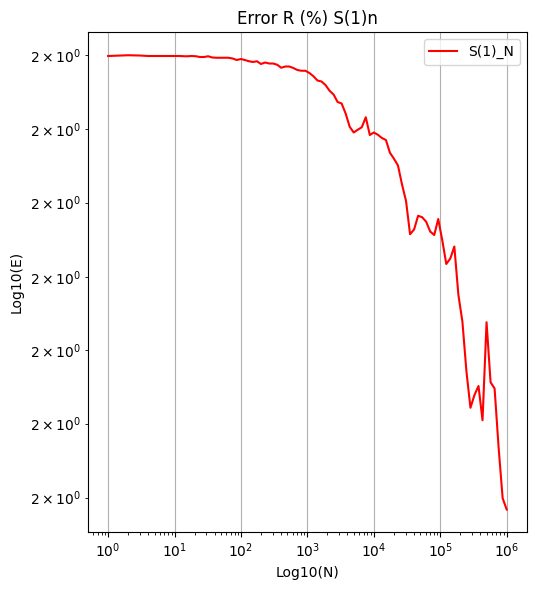

In [78]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.loglog(N_valores, ES1, color = 'r', linestyle='-', label='S(1)_N')
plt.title('Error R (%) S(1)n')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

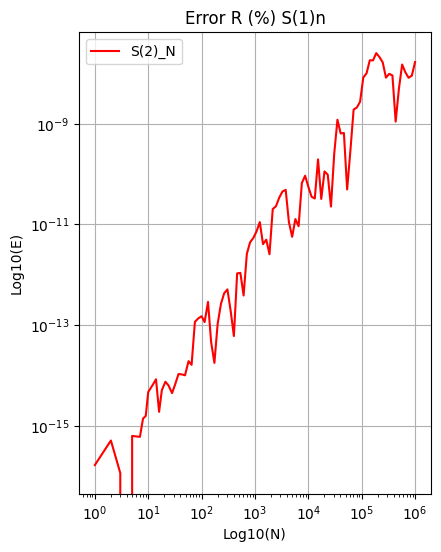

In [80]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 2)
plt.loglog(N_valores, ES2, color = 'r', linestyle='-', label='S(2)_N')
plt.title('Error R (%) S(1)n')
plt.xlabel('Log10(N)')
plt.ylabel('Log10(E)')
plt.grid(True)
plt.legend()

d. Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

 Los resultados muestran que la cancelación sustractiva afecta la precisión numérica, especialmente en S(1)_N.
 En S(2)_N se reduce este efecto al separar la suma, pero S(3)_N es la mejor opción al evitarla por completo. Es crucial entender y manejar la cancelación sustractiva para obtener resultados precisos, buscando métodos que la eviten.